In [16]:
from scipy.stats import norm
import math

def confidence_interval_norm(alpha, sigma, n, mean):
    value = -norm.ppf(alpha / 2) * sigma / math.sqrt(n)
    return int(round(mean - value)), int(round(mean + value))

In [11]:
from scipy.stats import t

def confidence_interval_t(alpha, s, n, mean):
    value = -t.ppf(alpha / 2, n - 1) * s / math.sqrt(n)
    return int(round(mean - value)), int(round(mean + value))

In [12]:
alpha = 0.1
s = 400
mean = 2000
n = 15
confidence_interval_t(alpha, s, n, mean)

(1818, 2182)

In [13]:
alpha = 0.05
confidence_interval_t(alpha, s, n, mean)

(1778, 2222)

In [14]:
alpha = 0.01
confidence_interval_t(alpha, s, n, mean)

(1693, 2307)

In [17]:
alpha = 0.01
sigma = 1150
n = 250
mean = 3540
confidence_interval_norm(alpha, sigma, n, mean)

(3353, 3727)

In [38]:
X = [1.2, 0.2, 1.6, 1.9, -0.4, 0.5, 1.4, 1.7, 2.5, 1.3]
X

[1.2, 0.2, 1.6, 1.9, -0.4, 0.5, 1.4, 1.7, 2.5, 1.3]

In [47]:
import statistics
from scipy.stats import t

def confidence_interval_t(alpha, s, n, mean):
    value = -t.ppf(alpha / 2, n - 1) * s / math.sqrt(n)
    return mean - value, mean + value

alpha = 0.05
s = math.sqrt(statistics.variance(X))
mean = statistics.mean(X)
n = len(X)
confidence_interval_t(alpha, s, n, mean)

(0.5732883999380967, 1.8067116000619032)

In [48]:
# 3.8.1
n = 189
positive = 132

In [59]:
p = positive / n
round(p, 3)

0.698

In [60]:
alpha = 0.1
z = -norm.ppf(alpha / 2)
p_gen = [round(p - z * math.sqrt(p * (1-p) / n), 3), round(p + z * math.sqrt(p * (1-p) / n), 3)]
p_gen

[0.644, 0.753]

In [61]:
-norm.ppf(alpha / 2)

1.6448536269514729

# 3.9. Находим z-критическое и t-критическое

In [64]:
from scipy.stats import norm

In [65]:
alpha = 0.03
value = -norm.ppf(alpha/2)
print(value) # 2.17

2.1700903775845606


In [67]:
# 0.95 - доверительный интервал, 100-1 число степеней свободы
# для двустороннего t-теста
value = t.ppf((1 + 0.95)/2, 100-1)
print(value) # 1.98

1.9842169515086827


In [75]:
def norm_func(alpha):
    return round(-norm.ppf(alpha/2), 2)

def z_func(alpha, k):
    return round(-t.ppf(alpha/2, k-1), 2)

In [76]:
norm_func(0.07)

1.81

In [80]:
norm_func(0.01)

2.58

In [78]:
z_func(0.05, 100)

1.98

In [79]:
norm_func(0.05)

1.96

# 4.7. Практика. Альтернативная и нулевая гипотезы

In [81]:
from scipy.stats import norm
import math

In [85]:
mu = 14
n = 64
x = 13.5
sigma = 2
alpha = 0.05
z = (x - mu) / (sigma/math.sqrt(n))
z

-2.0

In [89]:
p = round(norm.cdf(z), 3)
p

0.023

In [90]:
mu = 455
n = 16
sigma = 12.5
x = 449
alpha = 0.05
z = (x - mu) / (sigma/math.sqrt(n))
z

-1.92

In [94]:
p = round(2*norm.cdf(z), 3)
p

0.055

In [95]:
p = round(norm.cdf(z), 3)
p

0.027

# 4.8. Практика. z-статистика и t-статистика

Чтобы найти p-value для t-статистики, применяйте одну из функций:

stats.t.cdf(), если в альтернативной гипотезе стоит знак <; эта функция находит площадь «левого хвоста» на графике плотности распределения Стьюдента — площадь под кривой слева от заданной точки;

1 - stats.t.cdf(), если в альтернативной гипотезе стоит знак >; эта функция находит площадь «правого хвоста» на графике плотности распределения Стьюдента — площадь под кривой справа от заданной точки;

(1 - stats.t.cdf()) * 2, если в альтернативной гипотезе стоит знак ≠; эта функция находит площадь «хвоста» на графике плотности распределения Стьюдента и возвращает ее удвоенное значение.
Функции группы stats.t.cdf имеют следующие аргументы:

значение t-статистики;
количество степеней свободы df — находим как (n-1).

In [99]:
mu = 6.5
n = 25
x = 7
sigma = 1.4
z = (x - mu) / (sigma/math.sqrt(n))
p = round(1 - norm.cdf(z), 3)
p

0.037

In [102]:
from scipy.stats import t
mu = 12000
n = 135
x = 11500
sigma = 5110
z = (x - mu) / (sigma/math.sqrt(n))
print(round(z,3))
p = round(t.cdf(z, n-1), 3)
print(p)

-1.137
0.129


In [103]:
X = [6.1, 9.2, 11.5, 8.6, 12.1, 3.9, 8.4, 10.1, 9.4, 8.9]

In [105]:
import statistics
from scipy.stats import t
mu = 10
n = len(X)
x = sum(X) / len(X)
sigma = statistics.variance(X)
z = (x - mu) / (sigma/math.sqrt(n))
print(round(z,3))
p = round(t.cdf(z, n-1), 3)
print(p)

-0.647
0.267


In [107]:
p = 0.75
n = 125
pos = 87
ps = pos/n
z = (ps - p)/math.sqrt(p*(1-p)/n)
print(round(z, 3))
p = round(norm.cdf(z), 3)
print(p)

-1.394
0.082


In [108]:
from statsmodels.stats import weightstats 

Чтобы сделать тест z-test, нужно использовать weightstats.CompareMeans.ztest_ind():

weightstats.CompareMeans.ztest_ind() – для формулы ниже. Используется крайне редко, только если известны истинные стандартные отклонения.

Чтобы сделать тест t-test, нужно использовать weightstats.ttest_ind():

 weightstats.ttest_ind() – для вот этой формулы:


In [115]:
import pandas as pd
df = pd.DataFrame({
    'x': [6.1, 9.2, 11.5, 8.6, 12.1, 3.9, 8.4, 10.1, 9.4, 8.9],
    'y': [7.3, 8.7, 12.6, 6.8, 12, 6.9, 10.2, 17.1, 9.2, 11.6]
})

In [119]:
 weightstats.ttest_ind(df['x'], df['y'], usevar='unequal')

(-1.120432065446935, 0.27840903994521154, 16.673890238780608)

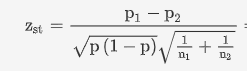

In [121]:
ay = 62
an = 38
by = 29
bn = 71

In [122]:
p1 = ay / (ay + an)
p2 = by / (by + bn)
p = (ay + by) / (ay + an + by + bn)

In [124]:
z = (p1 - p2) / (math.sqrt(p*(1-p)) * math.sqrt(1/(ay + an) + 1/(by + bn)))
print(round(z, 2))

4.69


In [126]:
1-norm.cdf(z)

1.3935165942280392e-06